### 뉴스 기사 분류: 다중 분류 문제

In [ ]:
* 로이터 뉴스에서 공개한 46개의 뉴스와 토픽에 대한 학습 데이터

* 1개의 뉴스는 1개의 토픽과 매칭되는 단일 레이블 다중 분류문제

In [21]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

* 신경망에서는 리스트를 주입 할 수 없으므로 원-핫 인코딩(리스트->벡터)을 통해 변환을 시켜줌

### 데이터 준비

In [3]:
# 코드 3-14 데이터 인코딩하기

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# 레이블 벡터 변환
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [4]:
# keras 내장 함수
from keras.utils.np_utils  import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### 모델 구성

* 46개의 데이터라 이전 처럼 16차원은 데이터 표현을 못하므로 64로 늘림

* 마지막 벡터값이 46개 (출력값이 46차원)

* softmax 함수를 사용하여 46개 벡터에 대한 확률분포를 계산한다

In [25]:
# 코드 3-15 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

* 손실함수는 categorical_crossentropy를 사용-> 두 확률분포사이의 거리를 측정해서 최소화, 최적화 해줌

In [27]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 훈련 검증

In [7]:
# 코드 3-17 검증 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

* 20 epoch로 학습

In [30]:
# 코드 3-18 모델 훈련하기
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 227us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7204 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 112us/step - loss: 1.4450 - acc: 0.6878 - val_loss: 1.3457 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 115us/step - loss: 1.0951 - acc: 0.7648 - val_loss: 1.1704 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 115us/step - loss: 0.8695 - acc: 0.8161 - val_loss: 1.0795 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.7032 - acc: 0.8480 - val_loss: 0.9846 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.5665 - acc: 0.8795 - val_loss: 0.9409 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 159us/step - loss: 0.4580 - acc: 0.9049 - val_loss: 0.9074 - val_acc: 0.8010


In [28]:
import matplotlib.pyplot as plt

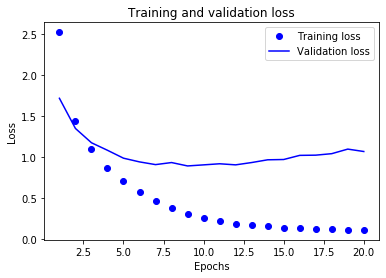

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

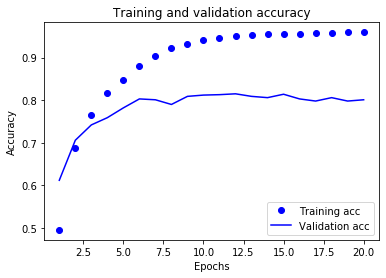

In [31]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

* 8-9번째 이후에 오버피팅이 이뤄짐

* epoch 9번만 학습

In [32]:
# 코드 3-21 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 157us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 117us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 115us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 114us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 115us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 116us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 116us/step - loss: 0.4124 - acc: 0.9139 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

* 약 78%의 정확도가 도출

In [12]:
results

[1.0227517058354665, 0.7756010686194165]

In [13]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.182546749777382

### 새로운 데이터에 대해 예측하기

In [14]:
predictions = model.predict(x_test)

In [15]:
predictions[0].shape

(46,)

In [16]:
np.sum(predictions[0])

0.99999976

In [17]:
np.argmax(predictions[0])

3

In [18]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

* 손실함수를 sparse_categorical_crossentropy로 변경(정수형 레이블일때 사용)

In [19]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

* 충분히 큰 중간층을 둬야함

* 46차원 보다 작은 중간측이 있을 경우 병목현상이 생김

* 46차원의 데이터를 4차원 데이터로 압축표현하려 하면서 데이터에 대한 손실이 생기기 때문에 예측결과에 손실이 생김

In [36]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 218us/step - loss: 3.3968 - acc: 0.0550 - val_loss: 2.8677 - val_acc: 0.3380
Epoch 2/20
7982/7982 [==============================] - 1s 175us/step - loss: 2.3203 - acc: 0.3877 - val_loss: 1.9753 - val_acc: 0.4240
Epoch 3/20
7982/7982 [==============================] - 1s 171us/step - loss: 1.7550 - acc: 0.5298 - val_loss: 1.7521 - val_acc: 0.5710
Epoch 4/20
7982/7982 [==============================] - 1s 175us/step - loss: 1.5369 - acc: 0.5807 - val_loss: 1.6619 - val_acc: 0.5710
Epoch 5/20
7982/7982 [==============================] - 1s 176us/step - loss: 1.4354 - acc: 0.5868 - val_loss: 1.6495 - val_acc: 0.5780
Epoch 6/20
7982/7982 [==============================] - 1s 173us/step - loss: 1.3734 - acc: 0.5940 - val_loss: 1.6371 - val_acc: 0.5790
Epoch 7/20
7982/7982 [==============================] - 1s 174us/step - loss: 1.3002 - acc: 0.6125 - val_loss: 1.5912 - val_acc: 0.6120
